In [5]:
from binance import Client,ThreadedWebsocketManager,ThreadedDepthCacheManager
import pandas as pd


In [6]:
apikey = "ulzJsyEgmJ579IetafAXdOVeBgg46PWs6ifKbFdT67ewbtWyTTrfOd3jKTfkxXrQ"

In [8]:
secret = "pc9hgc0E7PpRELmQpFH95foWFs407h5CLGapg7eDjJgIobyrONeOEXk7o8iJjJME"

In [9]:
cc = Client(apikey,secret)

In [10]:
tickers = cc.get_all_tickers()

In [11]:
data = pd.DataFrame(tickers)

In [12]:
data


,symbol,price
0,ETHBTC,0.05236000
1,LTCBTC,0.00165200
2,BNBBTC,0.00616700
3,NEOBTC,0.00032010
4,QTUMETH,0.00142000
...,...,...
2402,ACEBTC,0.00030338
2403,ACETRY,391.45000000
2404,BLZFDUSD,0.36400000
2405,RARETRY,4.16300000


In [13]:
data.set_index('symbol', inplace=True)

In [16]:
depth = cc.get_order_book(symbol='BTCUSDT')


In [17]:
data1= pd.DataFrame(depth)

In [18]:
data1 = pd.DataFrame(depth['asks'])

In [22]:
data1.columns = ['Price', 'Volume']


In [24]:
hist = cc.get_historical_klines('ETHBTC', Client.KLINE_INTERVAL_1DAY, '1 Jan 2017') 

In [25]:
data3 = pd.DataFrame(hist)

In [28]:
data3.columns = ['Open Time', 'Open', 'High', 
'Low', 'Close', 'Volume', 'Close Time','Quote Asset Volume', 'Number of Trades', 'TB Base Volume','TB Quote Volume', 'Ignore']

In [29]:
data3['Open Time'] = pd.to_datetime(data3['Open Time']/1000, unit='s')

In [30]:
 data3['Close Time'] = pd.to_datetime(data3['Close Time']/1000, unit='s')


In [31]:
numeric_columns = ['Open', 'High', 'Low', 'Close','Volume', 'Quote Asset Volume', 'TB Base Volume','TB Quote Volume']

In [32]:
data3[numeric_columns] = data3[numeric_columns].apply(pd.to_numeric,axis=1)

In [33]:
data3.describe()

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume
count,2354.000000,2354.000000,2354.000000,2354.000000,2.354000e+03,2354.000000,2.354000e+03,2354.000000,2354.000000
mean,0.051474,0.052512,0.050386,0.051461,1.643860e+05,7115.424693,1.818390e+05,82272.469196,3553.733859
std,0.021536,0.021968,0.021094,0.021528,1.376829e+05,5655.073243,1.304192e+05,68854.778118,2788.965608
min,0.016415,0.016560,0.016150,0.016415,1.942057e+03,170.238524,1.994000e+03,1076.405000,94.825272
25%,0.031166,0.031748,0.030624,0.031165,7.425401e+04,3474.254448,9.883100e+04,36464.951225,1723.623068
50%,0.056305,0.057357,0.055100,0.056291,1.286988e+05,5966.502808,1.537655e+05,64846.268150,3036.097856
75%,0.070071,0.071195,0.068752,0.070052,2.189819e+05,9005.975476,2.293998e+05,110936.285250,4536.953209
max,0.113075,0.123799,0.109343,0.113185,1.396957e+06,56836.342035,1.201493e+06,701279.783000,28345.303271


In [34]:
import mplfinance as mpf

In [35]:
data3.set_index('Close Time').tail(100)

,Open Time,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
Close Time,,,,,,,,,,,
2023-09-15 23:59:59.999000064,2023-09-15,0.06132,0.06179,0.06117,0.06171,11105.4606,682.538207,22826,5487.9506,337.312730,0
2023-09-16 23:59:59.999000064,2023-09-16,0.06170,0.06182,0.06153,0.06156,5888.0739,363.139984,14968,2905.2971,179.200426,0
2023-09-17 23:59:59.999000064,2023-09-17,0.06155,0.06155,0.06104,0.06116,8298.8897,508.903479,19115,3725.3118,228.457900,0
2023-09-18 23:59:59.999000064,2023-09-18,0.06116,0.06133,0.06066,0.06117,20959.6612,1278.175909,35663,8946.1224,545.769219,0
2023-09-19 23:59:59.999000064,2023-09-19,0.06116,0.06118,0.06026,0.06040,15277.8274,926.628726,31025,6342.3549,384.654285,0
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-19 23:59:59.999000064,2023-12-19,0.05203,0.05235,0.05107,0.05152,30032.8385,1553.518133,50003,14164.9476,733.230901,0
2023-12-20 23:59:59.999000064,2023-12-20,0.05152,0.05189,0.04977,0.05044,45987.9893,2339.801179,68261,19169.2023,976.249601,0
2023-12-21 23:59:59.999000064,2023-12-21,0.05043,0.05166,0.05028,0.05106,41201.6153,2098.211874,61387,18732.2970,955.291754,0


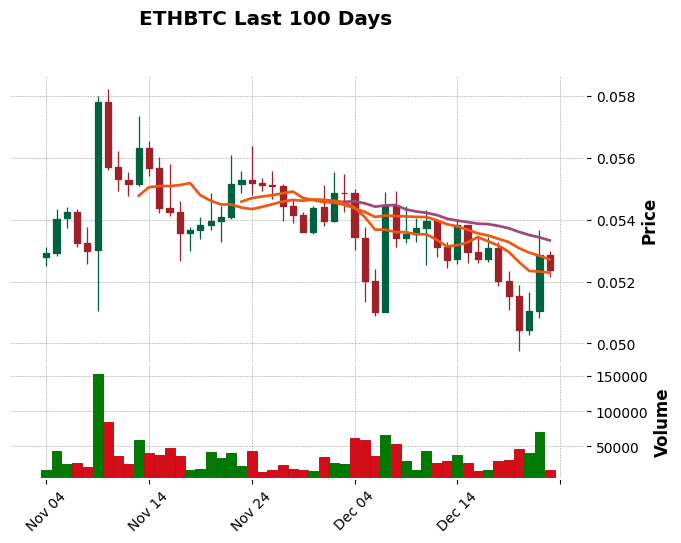

In [38]:
mpf.plot(data3.set_index('Close Time').tail(50),type='candle', style='charles',volume=True,title='ETHBTC Last 100 Days',mav=(10,20,30))

In [42]:
data3.head(5)

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2017-07-14,0.080000,0.091033,0.080000,0.090993,1942.057,2017-07-14 23:59:59.999000064,170.238524,1994,1076.405,94.825272,0
1,2017-07-15,0.090993,0.093699,0.087127,0.087635,4013.066,2017-07-15 23:59:59.999000064,363.031788,4623,2250.318,203.541498,0
2,2017-07-16,0.087508,0.087635,0.075591,0.082241,8904.158,2017-07-16 23:59:59.999000064,722.212482,8137,5557.575,450.343887,0
3,2017-07-17,0.082368,0.088394,0.081699,0.087537,6650.933,2017-07-17 23:59:59.999000064,568.246538,7639,3859.485,329.668753,0
4,2017-07-18,0.087831,0.109068,0.084777,0.107732,7245.741,2017-07-18 23:59:59.999000064,674.497850,8121,4202.055,393.111403,0
